In [1]:
# Install the nltk library in case you have not yet installed it
# pip stands for preferred installer program under Python Package Index (PyPI)

!pip install nltk

In [2]:
# Import relevant packages
import matplotlib.pyplot as plt
import nltk
import numpy as np
import re 
import pandas as pd
import string
import seaborn as sns

from nltk.corpus import stopwords  # Remove useless words
from nltk.stem.lancaster import LancasterStemmer  # Convert words to base form; aggressive

# Import packages that help us to create document-term matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [3]:
# In case there is a bug, just download stopwords again.
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Visual
[nltk_data]     singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Stopwords are a list of 'useless' words
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

# Load the CSV and take a peek at 1st 5 rows

In [5]:
data = pd.read_csv(r"C:\Users\Visual singh\OneDrive\punit\Internship With Flip Robo\1842\10-51022\Malignant-Comments-Classifier-Project\Malignant Comments Classifier Project\train.csv")
data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


# Let's see how the 1st 3 comments look like

In [7]:
data['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [8]:

data['comment_text'][1]

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

In [9]:
data['comment_text'][3]

'"\nMore\nI can\'t make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It\'s listed in the relevant form eg Wikipedia:Good_article_nominations#Transport  "'

# Exploratory Data Analysis

In [10]:
# Check percentage of comments that are toxic compared to normal comments
data.malignant.value_counts(normalize=True)

0    0.904156
1    0.095844
Name: malignant, dtype: float64

In [11]:
data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [12]:
#Create a new subset of the data by only taking the 2nd column onwards (comments and categories)
data_count=data.iloc[:,2:].sum()

In [13]:
data_count

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

C:\Users\Visual singh\anaconda3\anaconda file\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


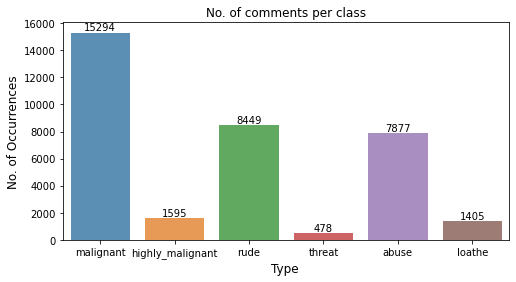

In [14]:
# Plot a chart with the following size
plt.figure(figsize=(8,4))

# Plot a bar chart using the index (category values) and the count of each category. alpha = 0.8 to make the bars more translucent
ax = sns.barplot(data_count.index, data_count.values, alpha=0.8)

plt.title("No. of comments per class")
plt.ylabel('No. of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)

#adding the text labels for each bar
rects = ax.patches
labels = data_count.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [15]:
num_rows = len(data)
print(num_rows)

159571


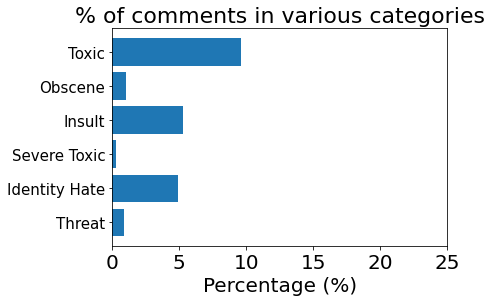

In [17]:
# Create a bar graph 
sum_malignant = data['malignant'].sum() / num_rows * 100
sum_highly_malignan = data['highly_malignant'].sum() / num_rows * 100
sum_rude = data['rude'].sum() / num_rows * 100
sum_threat = data['threat'].sum() / num_rows * 100
sum_abuse = data['abuse'].sum() / num_rows * 100
sum_loathe = data['loathe'].sum() / num_rows * 100

# Initiate a list of 6 values that represent the 6 x-axis values for the categories
ind = np.arange(6)

# Let the ind variable be the x-axis, whereas the % of toxicity for each category be the y-axis.
# Sequence of % have been sorted manually. This method cannot be done if there are large numbers of categories.
ax = plt.barh(ind, [sum_malignant, sum_highly_malignan, sum_rude, sum_threat, sum_abuse, sum_loathe])
plt.xlabel('Percentage (%)', size=20)
plt.xticks(np.arange(0, 30, 5), size=20)
plt.title('% of comments in various categories', size=22)
plt.yticks(ind, ('Toxic', 'Obscene', 'Insult', 'Severe Toxic', 'Identity Hate', 'Threat', ), size=15)

# Invert the graph so that it is in descending order.
plt.gca().invert_yaxis()
plt.show()


In [18]:
# Text preprocessing steps - remove numbers, capital letters, punctuation, '\n'
import re
import string

# remove all numbers with letters attached to them
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

# '[%s]' % re.escape(string.punctuation),' ' - replace punctuation with white space
# .lower() - convert all strings to lowercase 
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

# Remove all '\n' in the string and replace it with a space
remove_n = lambda x: re.sub("\n", " ", x)

# Remove all non-ascii characters 
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

# Apply all the lambda functions wrote previously through .map on the comments column
data['comment_text'] = data['comment_text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

data['comment_text'][0]

'explanation why the edits made under my username hardcore metallica fan were reverted  they weren t vandalisms  just closure on some gas after i voted at new york dolls fac  and please don t remove the template from the talk page since i m retired now        '

# Separate our dataset into 6 sections. Each section is comment + 1 category

In [19]:
data_malignant = data.loc[:,['id','comment_text','malignant']]

In [20]:
data_malignant['comment_text'][0]

'explanation why the edits made under my username hardcore metallica fan were reverted  they weren t vandalisms  just closure on some gas after i voted at new york dolls fac  and please don t remove the template from the talk page since i m retired now        '

In [21]:

data_malignant['comment_text'][1]

'd aww  he matches this background colour i m seemingly stuck with  thanks    talk       january       utc '

In [22]:
data_highly_malignant = data.loc[:,['id','comment_text','highly_malignant']]

In [23]:
data_rude = data.loc[:,['id','comment_text','rude']]

In [24]:
data_threat = data.loc[:,['id','comment_text','threat']]

In [25]:
data_abuse = data.loc[:,['id','comment_text','abuse']]

In [26]:
data_loathe = data.loc[:,['id','comment_text','loathe']]

# Creating WordCloud


# Useful to show the words which occur most frequently for each category. Warning: Profanity ahead.

In [27]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [28]:
def wordcloud(df, label):
    
    # Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc= WordCloud(background_color="black",max_words=4000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

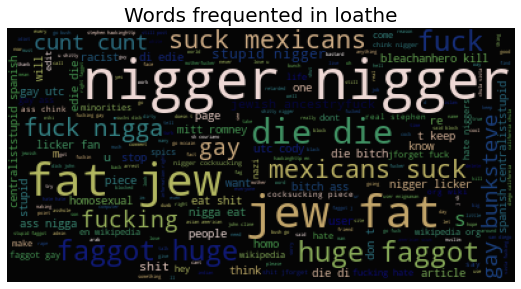

In [29]:
wordcloud(data_loathe,'loathe')

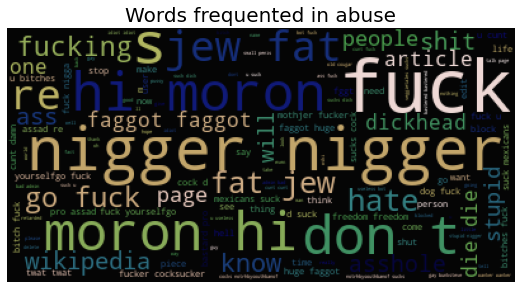

In [30]:
wordcloud(data_abuse, 'abuse')

In [31]:
data_malignant.head()

,id,comment_text,malignant
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0


In [32]:
data_malignant_1 = data_malignant[data_malignant['malignant'] == 1].iloc[0:5000,:]
data_malignant_1.shape

(5000, 3)

In [33]:
data_malignant_0 = data_malignant[data_malignant['malignant'] == 0].iloc[0:5000,:]

In [34]:
data_malignant_done = pd.concat([data_malignant_1, data_malignant_0], axis=0)
data_malignant.shape

(159571, 3)

### Not all categories have 5000 rows. So we should count them first and make them balanced.

In [35]:
data_highly_malignant[data_highly_malignant['highly_malignant'] == 1].count()

id                  1595
comment_text        1595
highly_malignant    1595
dtype: int64

In [36]:
data_highly_malignant_1 = data_highly_malignant[data_highly_malignant['highly_malignant'] == 1].iloc[0:1595,:]
data_highly_malignant_0 = data_highly_malignant[data_highly_malignant['highly_malignant'] == 0].iloc[0:1595,:]
data_highly_malignant_done = pd.concat([data_highly_malignant_1, data_highly_malignant_0], axis=0)
data_highly_malignant_done.shape

(3190, 3)

In [37]:
data_rude[data_rude['rude'] == 1].count()

id              8449
comment_text    8449
rude            8449
dtype: int64

In [38]:
data_rude_1 = data_rude[data_rude['rude'] == 1].iloc[0:5000,:]
data_rude_0 = data_rude[data_rude['rude'] == 0].iloc[0:5000,:]
data_rude_done = pd.concat([data_rude_1, data_rude_0], axis=0)
data_rude_done.shape

(10000, 3)

In [39]:
data_threat[data_threat['threat'] == 1].count()

id              478
comment_text    478
threat          478
dtype: int64

In [40]:
data_threat_1 = data_threat[data_threat['threat'] == 1].iloc[0:478,:]

# We include 1912 comments that have no threat so that the data with threat (478) will represent 20% of the dataset.
data_threat_0 = data_threat[data_threat['threat'] == 0].iloc[0:1912,:]  
data_threat_done = pd.concat([data_threat_1, data_threat_0], axis=0)
data_threat_done.shape

(2390, 3)

In [41]:

data_abuse[data_abuse['abuse'] == 1].count()

id              7877
comment_text    7877
abuse           7877
dtype: int64

In [42]:

data_abuse_1 = data_abuse[data_abuse['abuse'] == 1].iloc[0:5000,:]
data_abuse_0 = data_abuse[data_abuse['abuse'] == 0].iloc[0:5000,:]
data_abuse_done = pd.concat([data_abuse_1, data_abuse_0], axis=0)
data_abuse_done.shape

(10000, 3)

In [43]:
data_loathe[data_loathe['loathe'] == 1].count()

id              1405
comment_text    1405
loathe          1405
dtype: int64

In [44]:
data_loathe_1 = data_loathe[data_loathe['loathe'] == 1].iloc[0:1405,:] # 20%
data_loathe_0 = data_loathe[data_loathe['loathe'] == 0].iloc[0:5620,:] # 80%
data_loathe_done = pd.concat([data_loathe_1, data_loathe_0], axis=0)
data_loathe_done.shape

(7025, 3)

# Import relevant packages for modelling

In [45]:
# Import packages for pre-processing
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel

# Import tools to split data and evaluate model performance
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

# Import ML algos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

### Create simple function that takes in a dataset and allows user to choose dataset, toxicity label, vectorizer and number of ngrams

In [46]:
'''
df_done: data_tox_done, data_sev_done, ...
label: toxic, severe_toxic, ...
vectorizer values: CountVectorizer, TfidfVectorizer
gram_range values: (1,1) for unigram, (2,2) for bigram
'''
def cv_tf_train_test(df_done,label,vectorizer,ngram):

    ''' Train/Test split'''
    # Split the data into X and y data sets
    X = df_done.comment_text
    y = df_done[label]

    # Split our data into training and test data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    ''' Count Vectorizer/TF-IDF '''

    # Create a Vectorizer object and remove stopwords from the table
    cv1 = vectorizer(ngram_range=(ngram), stop_words='english')
    
    X_train_cv1 = cv1.fit_transform(X_train) # Learn the vocabulary dictionary and return term-document matrix
    X_test_cv1  = cv1.transform(X_test)      # Learn a vocabulary dictionary of all tokens in the raw documents.
    
    # Output a Dataframe of the CountVectorizer with unique words as the labels
    # test = pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names())
        
    ''' Initialize all model objects and fit the models on the training data '''
    lr = LogisticRegression()
    lr.fit(X_train_cv1, y_train)
    print('lr done')

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_cv1, y_train)

    bnb = BernoulliNB()
    bnb.fit(X_train_cv1, y_train)
    print('bnb done')
    
    mnb = MultinomialNB()
    mnb.fit(X_train_cv1, y_train)
    print('mnb done')
    
    svm_model = LinearSVC()
    svm_model.fit(X_train_cv1, y_train)

    randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
    randomforest.fit(X_train_cv1, y_train)
    print('rdf done')
    
    # Create a list of F1 score of all models 
    f1_score_data = {'F1 Score':[f1_score(lr.predict(X_test_cv1), y_test), f1_score(knn.predict(X_test_cv1), y_test), 
                                f1_score(bnb.predict(X_test_cv1), y_test), f1_score(mnb.predict(X_test_cv1), y_test),
                                f1_score(svm_model.predict(X_test_cv1), y_test), f1_score(randomforest.predict(X_test_cv1), y_test)]} 
                          
    # Create DataFrame with the model names as column labels
    df_f1 = pd.DataFrame(f1_score_data, index=['Log Regression','KNN', 'BernoulliNB', 'MultinomialNB', 'SVM', 'Random Forest'])  

    return df_f1

### Let's create a TF-IDF vectorizer object for each category and calculate the F1 scores across all models

In [47]:
'''
def cv_tf_train_test(df_done,label,vectorizer,ngram)
vectorizer values: CountVectorizer, TfidfVectorizer
ngram_range values: (1,1) for unigram, (2,2) for bigram
'''

import time

t0 = time.time()

df_malignant_cv = cv_tf_train_test(data_malignant_done, 'malignant', TfidfVectorizer, (1,1))
df_malignant_cv.rename(columns={'F1 Score': 'F1 Score(malignant)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_malignant_cv

# Various permutations of the dataset, category, vectorizer and n-gram

# cv_tf_train_test(data_tox_done, 'toxic', CountVectorizer, (1,1))
# cv_tf_train_test(data_sev_done, 'severe_toxic', CountVectorizer, (1,1))
# cv_tf_train_test(data_obs_done, 'obscene', CountVectorizer, (1,1))
# cv_tf_train_test(data_thr_done, 'threat', CountVectorizer, (1,1))
# cv_tf_train_test(data_ins_done, 'insult', CountVectorizer, (1,1))
# cv_tf_train_test(data_ide_done, 'identity_hate', CountVectorizer, (1,1))

# cv_tf_train_test(data_tox_done, 'toxic', TfidfVectorizer, (1,1))
# cv_tf_train_test(data_sev_done, 'severe_toxic', TfidfVectorizer, (1,1))
# cv_tf_train_test(data_obs_done, 'obscene', TfidfVectorizer, (1,1))
# cv_tf_train_test(data_thr_done, 'threat', TfidfVectorizer, (1,1))
# cv_tf_train_test(data_ins_done, 'insult', TfidfVectorizer, (1,1))
# cv_tf_train_test(data_ide_done, 'identity_hate', TfidfVectorizer, (1,1))

lr done
bnb done
mnb done
rdf done
Time taken: 9.5873122215271 seconds


,F1 Score(malignant)
Log Regression,0.860941
KNN,0.170616
BernoulliNB,0.776521
MultinomialNB,0.874958
SVM,0.876510
Random Forest,0.835621


In [48]:
t0 = time.time()

df_highly_malignant_cv = cv_tf_train_test(data_highly_malignant_done, 'highly_malignant', TfidfVectorizer, (1,1))
df_highly_malignant_cv.rename(columns={'F1 Score': 'F1 Score(highly_malignant)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)
df_highly_malignant_cv

lr done
bnb done
mnb done
rdf done
Time taken: 1.6105496883392334 seconds


,F1 Score(highly_malignant)
Log Regression,0.927879
KNN,0.837809
BernoulliNB,0.803707
MultinomialNB,0.936170
SVM,0.926004
Random Forest,0.927660


In [49]:
t0 = time.time()

df_rude_cv = cv_tf_train_test(data_rude_done, 'rude', TfidfVectorizer, (1,1))
df_rude_cv.rename(columns={'F1 Score': 'F1 Score(rude)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_rude_cv

lr done
bnb done
mnb done
rdf done
Time taken: 8.749881505966187 seconds


,F1 Score(rude)
Log Regression,0.908655
KNN,0.410982
BernoulliNB,0.787830
MultinomialNB,0.901399
SVM,0.921378
Random Forest,0.907370


In [50]:
t0 = time.time()

df_threat_cv = cv_tf_train_test(data_threat_done, 'threat', TfidfVectorizer, (1,1))
df_threat_cv.rename(columns={'F1 Score': 'F1 Score(threat)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_threat_cv

lr done
bnb done
mnb done
rdf done
Time taken: 1.0935373306274414 seconds


,F1 Score(threat)
Log Regression,0.628821
KNN,0.586207
BernoulliNB,0.311828
MultinomialNB,0.504762
SVM,0.786765
Random Forest,0.800000


In [51]:
t0 = time.time()

df_abuse_cv = cv_tf_train_test(data_abuse_done, 'abuse', TfidfVectorizer, (1,1))
df_abuse_cv.rename(columns={'F1 Score': 'F1 Score(abuse)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_abuse_cv

lr done
bnb done
mnb done
rdf done
Time taken: 9.388107538223267 seconds


,F1 Score(abuse)
Log Regression,0.896599
KNN,0.244898
BernoulliNB,0.783762
MultinomialNB,0.897411
SVM,0.902619
Random Forest,0.882616


In [52]:
t0 = time.time()

df_loathe_cv = cv_tf_train_test(data_loathe_done, 'loathe', TfidfVectorizer, (1,1))
df_loathe_cv.rename(columns={'F1 Score': 'F1 Score(loathe)'}, inplace=True)

t1 = time.time()

total = 'Time taken: {} seconds'.format(t1-t0)
print(total)

df_loathe_cv

lr done
bnb done
mnb done
rdf done
Time taken: 4.960323095321655 seconds


,F1 Score(loathe)
Log Regression,0.699029
KNN,0.197980
BernoulliNB,0.549206
MultinomialNB,0.485857
SVM,0.797516
Random Forest,0.769821


In [53]:
# Let's combine the dataframes into a master dataframe to compare F1 scores across all categories.
f1_all = pd.concat([df_malignant_cv, df_highly_malignant_cv, df_rude_cv, df_threat_cv, df_abuse_cv, df_loathe_cv], axis=1)
f1_all

,F1 Score(malignant),F1 Score(highly_malignant),F1 Score(rude),F1 Score(threat),F1 Score(abuse),F1 Score(loathe)
Log Regression,0.860941,0.927879,0.908655,0.628821,0.896599,0.699029
KNN,0.170616,0.837809,0.410982,0.586207,0.244898,0.197980
BernoulliNB,0.776521,0.803707,0.787830,0.311828,0.783762,0.549206
MultinomialNB,0.874958,0.936170,0.901399,0.504762,0.897411,0.485857
SVM,0.876510,0.926004,0.921378,0.786765,0.902619,0.797516
Random Forest,0.835621,0.927660,0.907370,0.800000,0.882616,0.769821


### Transpose the combined F1 dataframe to make it suitable for presentation on a graph

In [54]:
f1_all_trp = f1_all.transpose()
f1_all_trp

,Log Regression,KNN,BernoulliNB,MultinomialNB,SVM,Random Forest
F1 Score(malignant),0.860941,0.170616,0.776521,0.874958,0.876510,0.835621
F1 Score(highly_malignant),0.927879,0.837809,0.803707,0.936170,0.926004,0.927660
F1 Score(rude),0.908655,0.410982,0.787830,0.901399,0.921378,0.907370
F1 Score(threat),0.628821,0.586207,0.311828,0.504762,0.786765,0.800000
F1 Score(abuse),0.896599,0.244898,0.783762,0.897411,0.902619,0.882616
F1 Score(loathe),0.699029,0.197980,0.549206,0.485857,0.797516,0.769821


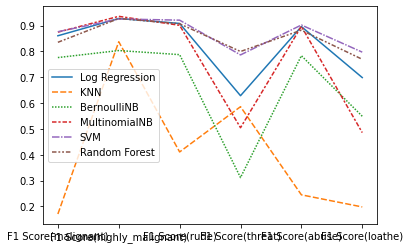

In [55]:
sns.lineplot(data=f1_all_trp)
sizes=(.25, 5.5)

#### Test if our code actually works. Probability of the comment falling in various categories should be output.

In [56]:
data_malignant_done.head()

,id,comment_text,malignant
6,0002bcb3da6cb337,cocksucker before you piss around on my work,1
12,0005c987bdfc9d4b,hey what is it talk what is it a...,1
16,0007e25b2121310b,bye don t look come or think of comming ba...,1
42,001810bf8c45bf5f,you are gay or antisemmitian archangel whit...,1
43,00190820581d90ce,fuck your filthy mother in the ass dry,1


In [57]:
X = data_malignant_done.comment_text
y = data_malignant_done['malignant']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initiate a Tfidf vectorizer
tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')

X_train_fit = tfv.fit_transform(X_train)  # Convert the X data into a document term matrix dataframe
X_test_fit = tfv.transform(X_test)  # Converts the X_test comments into Vectorized format

randomforest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train our SVM model with the X training data converted into Count Vectorized format with the Y training data
randomforest.fit(X_train_fit, y_train)
randomforest.predict(X_test_fit)

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [58]:
# Sample Prediction
comment1 = ['You piece of shit']
comment2 = ['What is up garden apple doing']

comment1_vect = tfv.transform(comment1)
randomforest.predict_proba(comment1_vect)[:,1]

array([1.])

In [59]:
comment2_vect = tfv.transform(comment2)
randomforest.predict_proba(comment2_vect)[:,1]

array([0.15430722])

# Pickling trained RandomForest models for all categories.


### We choose Random Forest instead of LinearSVC although the latter performs well, as RDF has predict_proba function and LinearSVC does not. We need to output a probability score for each comment, remember?

In [60]:
import pickle

### We have to pickle not only the TF-IDF vectorizer object, but also the RDF model trained on the related vectorizer.

In [61]:
'''
NOTE: This step has already been done for you. The pickled files are included in the github. Just for further reference.
You do NOT have to run this cell.
'''

def pickle_model(df, label):
    
    X = df.comment_text
    y = df[label]

    # Initiate a Tfidf vectorizer
    tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
    
    # Convert the X data into a document term matrix dataframe
    X_vect = tfv.fit_transform(X)  
    
    # saves the column labels (ie. the vocabulary)
    # wb means Writing to the file in Binary mode, written in byte objects
    with open(r"{}.pkl".format(label + '_vect'), "wb") as f:   
        pickle.dump(tfv, f)   
        
    randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
    randomforest.fit(X_vect, y)

    # Create a new pickle file based on random forest
    with open(r"{}.pkl".format(label + '_model'), "wb") as f:  
        pickle.dump(randomforest, f)

In [62]:
from flask import Flask, render_template, url_for, request, jsonify      
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
import pickle
import numpy as np


ImportError: cannot import name 'escape' from 'jinja2' (C:\Users\Visual singh\anaconda3\anaconda file\lib\site-packages\jinja2\__init__.py)